# Credit Card Approval Prediction using Machine Learning

This project aims to predict whether a credit card application will be approved using structured financial and behavioral data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_df = pd.read_csv("application_record.csv")

print(app_df.shape)
app_df.head()

(438557, 18)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
credit_df = pd.read_csv("credit_record.csv")

print(credit_df.shape)
credit_df.head()

(1048575, 3)


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [5]:
# Create target variable
credit_df['target'] = credit_df['STATUS'].apply(
    lambda x: 0 if x in ['1', '2', '3', '4', '5'] else 1
)

credit_df[['STATUS', 'target']].head(10)


,STATUS,target
0,X,1
1,0,1
2,0,1
3,0,1
4,C,1
5,C,1
6,C,1
7,C,1
8,C,1
9,C,1


In [6]:
df = app_df.merge(
    credit_df[['ID', 'target']],
    on='ID',
    how='inner'
)

print(df.shape)
df.head()


(777715, 19)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,1


In [7]:
df.isnull().sum()


,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [8]:
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')


In [9]:
df['OCCUPATION_TYPE'].isnull().sum()


np.int64(0)

In [10]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.shape)


(777715, 49)


In [11]:
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape)


(622172, 48) (155543, 48)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      0.00      0.00      2285
           1       0.99      1.00      0.99    153258

    accuracy                           0.99    155543
   macro avg       0.99      0.50      0.50    155543
weighted avg       0.99      0.99      0.98    155543



In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.62      0.14      0.22      2285
           1       0.99      1.00      0.99    153258

    accuracy                           0.99    155543
   macro avg       0.81      0.57      0.61    155543
weighted avg       0.98      0.99      0.98    155543



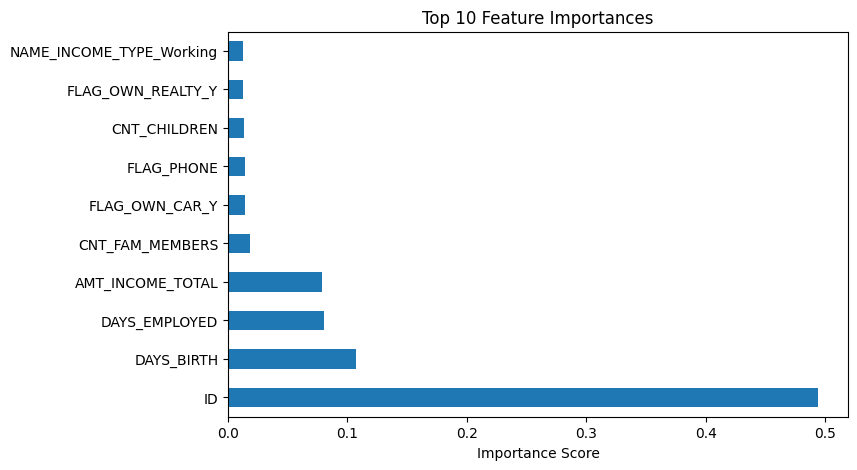

In [15]:
importances = rf.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
top_features = feat_imp.sort_values(ascending=False).head(10)

top_features.plot(kind='barh', figsize=(8, 5))
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()


## Conclusion

In this project, a machine learning pipeline was developed to predict credit card approval using structured financial and demographic data.

Logistic Regression served as a baseline model but struggled with the highly imbalanced dataset, failing to identify minority class cases effectively. Random Forest significantly improved minority class detection, demonstrating the advantage of ensemble models in financial risk assessment tasks.

Feature importance analysis highlighted applicant age and employment duration as key factors influencing credit approval decisions. The project demonstrates practical experience in data preprocessing, feature engineering, model evaluation, and business-oriented interpretation of machine learning results.



In [16]:
# Drop ID column (identifier, not a predictive feature)
df_encoded = df_encoded.drop('ID', axis=1)

print(df_encoded.shape)


(777715, 48)


In [17]:
# Separate features and target again
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_final = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_final.fit(X_train, y_train)

y_pred_final = rf_final.predict(X_test)

print(classification_report(y_test, y_pred_final))


              precision    recall  f1-score   support

           0       0.62      0.07      0.12      2285
           1       0.99      1.00      0.99    153258

    accuracy                           0.99    155543
   macro avg       0.80      0.53      0.56    155543
weighted avg       0.98      0.99      0.98    155543



In [18]:
# Install imbalanced-learn (Colab only needs this once)
!pip install imbalanced-learn


In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())



Before SMOTE: target
1    612882
0      9290
Name: count, dtype: int64
After SMOTE: target
1    612882
0    612882
Name: count, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = rf_smote.predict(X_test)

print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.08      0.69      0.15      2285
           1       0.99      0.88      0.94    153258

    accuracy                           0.88    155543
   macro avg       0.54      0.79      0.54    155543
weighted avg       0.98      0.88      0.92    155543



ROC-AUC Score: 0.8838885804412765


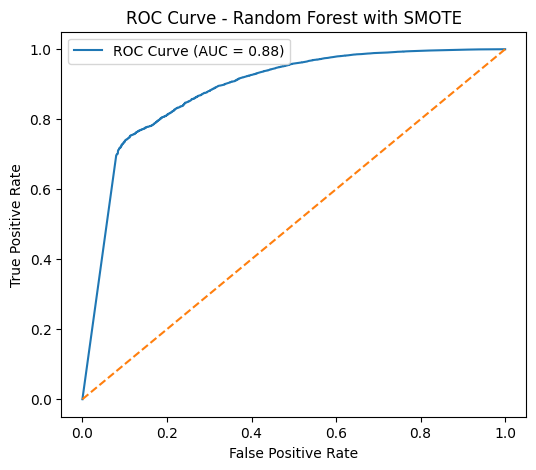

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get prediction probabilities
y_probs = rf_smote.predict_proba(X_test)[:, 1]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest with SMOTE")
plt.legend()
plt.show()


In [22]:
# Predicted probabilities for class 1
y_probs = rf_smote.predict_proba(X_test)[:, 1]

y_probs[:10]


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.76799187, 0.35232917, 1.        , 1.        , 0.41781733])

In [23]:
from sklearn.metrics import classification_report

# Apply custom threshold
threshold = 0.3
y_pred_thresh = (y_probs >= threshold).astype(int)

print(f"Results at threshold = {threshold}")
print(classification_report(y_test, y_pred_thresh))


Results at threshold = 0.3
              precision    recall  f1-score   support

           0       0.11      0.60      0.18      2285
           1       0.99      0.93      0.96    153258

    accuracy                           0.92    155543
   macro avg       0.55      0.76      0.57    155543
weighted avg       0.98      0.92      0.95    155543

